In [13]:
# Importing required libraries
import pandas as pd
import glob

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading Preprocessed file
train = pd.read_csv('./preprocess/preprocess_5.csv')

In [6]:
# Features extracted from Logistic regression model
col = ['Salary', 'Quarterly Rating', 'JoinDesignation_3', 'Designation_2',
       'Difference_Designation_1', 'Difference_Designation_2']

In [7]:
# Separating numerical and categorical variables
num_vars = ['Salary', 'Quarterly Rating']
cat_vars = ['JoinDesignation_3', 'Designation_2','Difference_Designation_1', 'Difference_Designation_2']

In [8]:
train_df = train[col + ['Emp_ID' ,'Attrition']]

In [9]:
train_df.head()

,Salary,Quarterly Rating,JoinDesignation_3,Designation_2,Difference_Designation_1,Difference_Designation_2,Emp_ID,Attrition
0,57387,2.0,0,0,0,0,1,1
1,67016,1.0,0,1,0,0,2,0
2,65603,1.0,0,1,0,0,4,1
3,46368,1.0,0,0,0,0,5,1
4,78728,1.6,1,0,0,0,6,0


In [10]:
Scaler = StandardScaler()

In [11]:
# Scaling numerical variables
train_df[num_vars] = Scaler.fit_transform(train_df[num_vars])

<ipython-input-11-879ad350bfca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[num_vars] = Scaler.fit_transform(train_df[num_vars])
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Building 2 Naive Bayes Models: 
Bernoulli Naive Bayes for Categorical variables
Gaussian Naive Bayes for Continuous Variables

Bernoulli Naive Bayes for Categorical variables

In [14]:
bnb = BernoulliNB()

In [15]:
bnb.fit(train_df[cat_vars], train_df['Attrition'])

BernoulliNB()

In [17]:
y_pred_class = bnb.predict(train_df[cat_vars])
y_pred_proba = bnb.predict_proba(train_df[cat_vars])

In [18]:
# Accuracy
metrics.accuracy_score(train_df['Attrition'], y_pred_class)

0.6875262494750105

In [19]:
# F1 Score
metrics.f1_score(train_df['Attrition'], y_pred_class)

0.8071539657853809

In [20]:
y_pred_proba

array([[0.28282622, 0.71717378],
       [0.25055392, 0.74944608],
       [0.25055392, 0.74944608],
       ...,
       [0.25055392, 0.74944608],
       [0.28282622, 0.71717378],
       [0.25055392, 0.74944608]])

In [21]:
y_pred_df = pd.DataFrame(y_pred_proba)
y_pred_df.head()

,0,1
0,0.282826,0.717174
1,0.250554,0.749446
2,0.250554,0.749446
3,0.282826,0.717174
4,0.436491,0.563509


In [22]:
# Probability of Attrition
y_pred_1 = y_pred_df[[1]]
y_pred_1.head()

,1
0,0.717174
1,0.749446
2,0.749446
3,0.717174
4,0.563509


In [23]:
y_test_df = pd.DataFrame(train_df['Attrition'])
y_test_df.head()

,Attrition
0,1
1,0
2,1
3,1
4,0


In [25]:
y_pred_final = pd.concat([train_df['Emp_ID'], train_df['Attrition'], y_pred_1], 1)
y_pred_final.head()

,Emp_ID,Attrition,1
0,1,1,0.717174
1,2,0,0.749446
2,4,1,0.749446
3,5,1,0.717174
4,6,0,0.563509


In [26]:
y_pred_final = y_pred_final.rename(columns= {1: 'Cat_Prob'})
y_pred_final.head()

,Emp_ID,Attrition,Cat_Prob
0,1,1,0.717174
1,2,0,0.749446
2,4,1,0.749446
3,5,1,0.717174
4,6,0,0.563509


Gaussian Naive Bayes for Continuous Variables

In [33]:
gnb = GaussianNB()

In [34]:
gnb.fit(train_df[num_vars], train_df['Attrition'])

GaussianNB()

In [35]:
y_pred_class = gnb.predict(train_df[num_vars])

In [42]:
y_pred_proba = gnb.predict_proba(train_df[num_vars])

In [36]:
metrics.accuracy_score(train_df['Attrition'], y_pred_class)

0.7400251994960101

In [37]:
metrics.f1_score(train_df['Attrition'], y_pred_class)

0.8232943191550101

In [48]:
y_pred_proba

array([[0.33232135, 0.66767865],
       [0.17312969, 0.82687031],
       [0.16979383, 0.83020617],
       ...,
       [0.18460337, 0.81539663],
       [0.22746444, 0.77253556],
       [0.52678892, 0.47321108]])

In [49]:
y_pred_df = pd.DataFrame(y_pred_proba)
y_pred_df.head()

,0,1
0,0.332321,0.667679
1,0.173130,0.826870
2,0.169794,0.830206
3,0.134711,0.865289
4,0.280444,0.719556


In [50]:
y_pred_1 = y_pred_df[[1]]
y_pred_1.head()

,1
0,0.667679
1,0.826870
2,0.830206
3,0.865289
4,0.719556


In [51]:
y_pred_final = pd.concat([y_pred_final, y_pred_1], 1)
y_pred_final.head()

,Emp_ID,Attrition,Cat_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
0,1,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.667679
1,2,0,0.749446,1,1,1,1,1,1,1,1,0,0,0.826870
2,4,1,0.749446,1,1,1,1,1,1,1,1,0,0,0.830206
3,5,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.865289
4,6,0,0.563509,1,1,1,1,1,1,0,0,0,0,0.719556


In [54]:
y_pred_final = y_pred_final.rename(columns = {1: 'Num_Prob'})
y_pred_final.head()

,Emp_ID,Attrition,Cat_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Num_Prob
0,1,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.667679
1,2,0,0.749446,1,1,1,1,1,1,1,1,0,0,0.826870
2,4,1,0.749446,1,1,1,1,1,1,1,1,0,0,0.830206
3,5,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.865289
4,6,0,0.563509,1,1,1,1,1,1,0,0,0,0,0.719556


In [56]:
y_pred_final['Attrition'].value_counts()/len(y_pred_final)

1    0.678706
0    0.321294
Name: Attrition, dtype: float64

In [57]:
y_pred_final['Prior_Prob'] = y_pred_final['Attrition'].apply(lambda x:0.678 if x==1 else 0.321)

In [58]:
y_pred_final.head()

,Emp_ID,Attrition,Cat_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Num_Prob,Prior_Prob
0,1,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.667679,0.678
1,2,0,0.749446,1,1,1,1,1,1,1,1,0,0,0.826870,0.321
2,4,1,0.749446,1,1,1,1,1,1,1,1,0,0,0.830206,0.678
3,5,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.865289,0.678
4,6,0,0.563509,1,1,1,1,1,1,0,0,0,0,0.719556,0.321


In [62]:
# Multiplying Bernoulli's probability and Gaussian Probability to get total probablity
y_pred_final['Prob'] = y_pred_final['Cat_Prob'] * y_pred_final['Num_Prob'] 
y_pred_final.head()

,Emp_ID,Attrition,Cat_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Num_Prob,Prior_Prob,Prob
0,1,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.667679,0.678,0.478842
1,2,0,0.749446,1,1,1,1,1,1,1,1,0,0,0.826870,0.321,0.619695
2,4,1,0.749446,1,1,1,1,1,1,1,1,0,0,0.830206,0.678,0.622195
3,5,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.865289,0.678,0.620563
4,6,0,0.563509,1,1,1,1,1,1,0,0,0,0,0.719556,0.321,0.405477


In [64]:
# Probability threshold 0.5
y_pred_final['Predicted'] = y_pred_final['Prob'].apply(lambda x:1 if x>0.5 else 0)
y_pred_final.head()

,Emp_ID,Attrition,Cat_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Num_Prob,Prior_Prob,Prob,Predicted
0,1,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.667679,0.678,0.478842,0
1,2,0,0.749446,1,1,1,1,1,1,1,1,0,0,0.826870,0.321,0.619695,1
2,4,1,0.749446,1,1,1,1,1,1,1,1,0,0,0.830206,0.678,0.622195,1
3,5,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.865289,0.678,0.620563,1
4,6,0,0.563509,1,1,1,1,1,1,0,0,0,0,0.719556,0.321,0.405477,0


In [65]:
# Accuracy
metrics.accuracy_score(y_pred_final['Attrition'], y_pred_final['Predicted'])

0.6577068458630827

In [66]:
# F1 Score
metrics.f1_score(y_pred_final['Attrition'], y_pred_final['Predicted'])

0.7147357367868393

In [86]:
y_pred_final = pd.concat([y_pred_final, train_df['Emp_ID']], 1)
y_pred_final.head()

,Attrition,Cat_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Num_Prob,Prior_Prob,Prob,Predicted,Emp_ID
0,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.667679,0.678,0.478842,0,1
1,0,0.749446,1,1,1,1,1,1,1,1,0,0,0.826870,0.321,0.619695,1,2
2,1,0.749446,1,1,1,1,1,1,1,1,0,0,0.830206,0.678,0.622195,1,4
3,1,0.717174,1,1,1,1,1,1,1,1,0,0,0.865289,0.678,0.620563,1,5
4,0,0.563509,1,1,1,1,1,1,0,0,0,0,0.719556,0.321,0.405477,0,6


In [94]:
y_pred_final = y_pred_final[['Emp_ID', 'Attrition', 'Prob', 'Predicted']]
y_pred_final.head()

,Emp_ID,Attrition,Prob,Predicted
0,1,1,0.478842,0
1,2,0,0.619695,1
2,4,1,0.622195,1
3,5,1,0.620563,1
4,6,0,0.405477,0


In [ ]:
cutoff_df = pd.DataFrame(columns=['Prob', 'accuracy', 'sensi', 'speci', 'preci', 'f1_score'])

In [95]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_pred_final[i] = y_pred_final['Prob'].map(lambda x:1 if x>i else 0)
    

In [96]:
y_pred_final.head()

,Emp_ID,Attrition,Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1,0.478842,0,1,1,1,1,1,0,0,0,0,0
1,2,0,0.619695,1,1,1,1,1,1,1,1,0,0,0
2,4,1,0.622195,1,1,1,1,1,1,1,1,0,0,0
3,5,1,0.620563,1,1,1,1,1,1,1,1,0,0,0
4,6,0,0.405477,0,1,1,1,1,1,0,0,0,0,0


In [97]:
for i in numbers:
    cm1 = metrics.confusion_matrix(y_pred_final['Attrition'], y_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/ total1
    sensi = cm1[1,1]/(cm1[1,1] + cm1[1,0])
    speci = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    preci = cm1[1,1]/(cm1[1,1] + cm1[0,1])
    f1_score = 2*(preci*sensi)/(preci+sensi)
    cutoff_df.loc[i] = [i, accuracy, sensi, speci, preci, f1_score]
print(cutoff_df)

     Prob  accuracy     sensi     speci     preci  f1_score
0.0   0.0  0.678706  1.000000  0.000000  0.678706  0.808606
0.1   0.1  0.728265  0.972153  0.213072  0.722964  0.829243
0.2   0.2  0.741705  0.943688  0.315033  0.744265  0.832196
0.3   0.3  0.739605  0.900990  0.398693  0.759916  0.824462
0.4   0.4  0.716086  0.813119  0.511111  0.778436  0.795400
0.5   0.5  0.657707  0.631807  0.712418  0.822724  0.714736
0.6   0.6  0.577488  0.469678  0.805229  0.835903  0.601426
0.7   0.7  0.321294  0.000000  1.000000       NaN       NaN
0.8   0.8  0.321294  0.000000  1.000000       NaN       NaN
0.9   0.9  0.321294  0.000000  1.000000       NaN       NaN


<AxesSubplot:xlabel='Prob'>

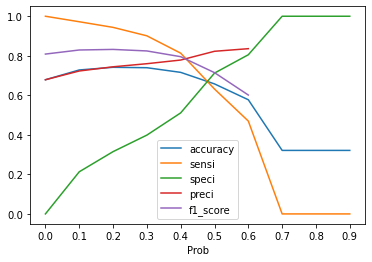

In [98]:
cutoff_df.plot.line(x='Prob', y=['accuracy','sensi','speci','preci','f1_score'], xticks = cutoff_df['Prob'])

In [118]:
# F1 Score and Precision is maximum at 0.4 probability
y_pred_final['final_predicted'] = y_pred_final['Prob'].apply(lambda x:1 if x>=0.4 else 0)
y_pred_final.head()

,Emp_ID,Attrition,Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,1,0.478842,0,1,1,1,1,1,0,0,0,0,0,1
1,2,0,0.619695,1,1,1,1,1,1,1,1,0,0,0,1
2,4,1,0.622195,1,1,1,1,1,1,1,1,0,0,0,1
3,5,1,0.620563,1,1,1,1,1,1,1,1,0,0,0,1
4,6,0,0.405477,0,1,1,1,1,1,0,0,0,0,0,1


In [119]:
# Fetching test filename
test_filename = glob.glob('test*csv')
test_filename

['test_hXY9mYw.csv']

In [120]:
test = pd.read_csv('./' + test_filename[0])
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [121]:
# Filtering predictions data with test data Emp_ID
output_df = pd.merge(y_pred_final, test,how='inner', on='Emp_ID')
output_df.head()

,Emp_ID,Attrition,Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,2,0,0.619695,1,1,1,1,1,1,1,1,0,0,0,1
1,6,0,0.405477,0,1,1,1,1,1,0,0,0,0,0,1
2,11,0,0.624500,1,1,1,1,1,1,1,1,0,0,0,1
3,14,0,0.501687,1,1,1,1,1,1,1,0,0,0,0,1
4,25,0,0.001115,0,1,0,0,0,0,0,0,0,0,0,0


In [122]:
submit_df = output_df[['Emp_ID', 'final_predicted']]
submit_df.head()

,Emp_ID,final_predicted
0,2,1
1,6,1
2,11,1
3,14,1
4,25,0


In [123]:
# Renaming column 
submit_df = submit_df.rename(columns={'final_predicted':'Target'})
submit_df.head()

,Emp_ID,Target
0,2,1
1,6,1
2,11,1
3,14,1
4,25,0


In [124]:
# Exporting Predictions
submit_df.to_csv('./Output/output_NB_final.csv', index=False)